In [1]:
# Copyright (C) 2019 Computational Science Lab, UPF <http://www.compscience.org/>
# Copying and distribution is allowed under AGPLv3 license
import sys
sys.path.insert(0, './../')

from ligdream import CompoundGenerator
import os
import torch

%matplotlib inline
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [2]:
def home():
    return os.getcwd()

In [3]:
my_gen = CompoundGenerator(use_cuda=True)  # set use_cuda=False if you do not have a GPU.

In [4]:
# Load the weights of the models
vae_weights =  os.path.join(home(), "modelweights/vae-210000.pkl")
encoder_weights =  os.path.join(home(), "modelweights/encoder-210000.pkl")
decoder_weights =os.path.join(home(), "modelweights/decoder-210000.pkl")

my_gen.load_weight(vae_weights, encoder_weights, decoder_weights)

In [5]:
seed_mol = "CN(C)Cc1ccc(CNC(=S)Nc2ccc(N)cc2)cc1"

gen_mols = my_gen.generate_molecules(seed_mol,
                                     n_attemps=20,  # How many attemps of generations will be carried out
                                     lam_fact=1.,  # Variability factor
                                     probab=False,  # Probabilistic RNN decoding
                                     filter_unique_valid=False)  # Filter out invalids and replicates

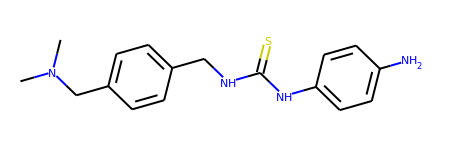

In [6]:
# Seed molecule
Chem.MolFromSmiles(seed_mol)

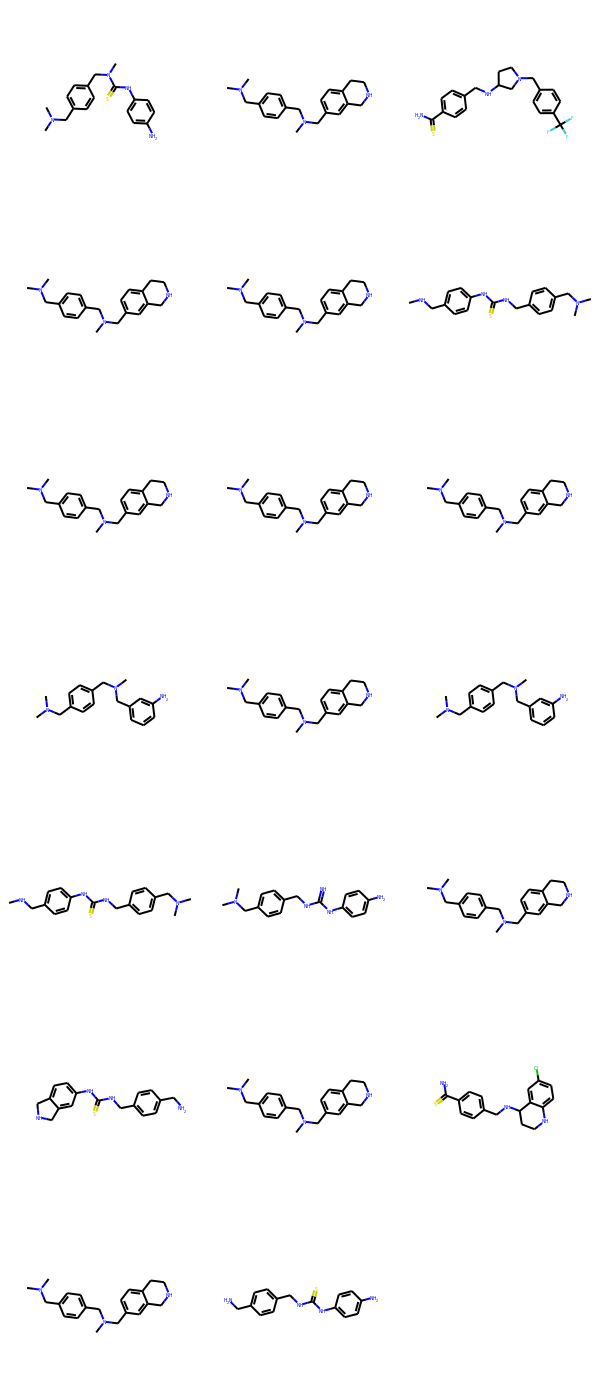

In [7]:
# Generated Molecules
Chem.Draw.MolsToGridImage(gen_mols)